In [80]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataframe

In [23]:
data = pd.read_csv('tabla_completa.csv')
data.describe()

,NUMERO,COD_VIAJE,UBICACION,CANTIDAD,INGRESO,CREDITO,MES,AÑO
count,2180.000000,2.180000e+03,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.0
mean,1090.500000,1.000109e+07,76001.502294,1098.804128,274.701032,58.486239,6.015138,2019.0
std,629.456114,6.294561e+02,0.500109,525.951701,131.487925,24.272854,3.141785,0.0
min,1.000000,1.000000e+07,76001.000000,200.000000,50.000000,30.000000,1.000000,2019.0
25%,545.750000,1.000055e+07,76001.000000,642.500000,160.625000,30.000000,3.000000,2019.0
50%,1090.500000,1.000109e+07,76002.000000,1097.500000,274.375000,60.000000,6.000000,2019.0
75%,1635.250000,1.000164e+07,76002.000000,1562.000000,390.500000,90.000000,9.000000,2019.0
max,2180.000000,1.000218e+07,76002.000000,1996.000000,499.000000,90.000000,11.000000,2019.0


### Cantidad de revenue generada en el año

In [168]:
Rev = data["INGRESO"].sum()
print(Rev)

598848.25


### Revenue generado por tipo de vehículo

In [76]:
## Segmentar la data por tipo de vehiculo
camion_grande = data.loc[data['UNIDAD'] == 'Camion Grande']
camion_pequeño = data.loc[data['UNIDAD'] == 'Camion Peque�o']
camion_panel = data.loc[data['UNIDAD'] == 'Panel']

## Revenue por cada tipo de vehiculo
rev_grande = camion_grande["INGRESO"].sum()
rev_pequeño = camion_pequeño["INGRESO"].sum()
rev_panel = camion_panel["INGRESO"].sum()

print('Ingreso por Camion Grande: ' + str(rev_grande))
print('Ingreso por Camion Pequeño: ' + str(rev_pequeño))
print('Ingreso por Panel: ' + str(rev_panel))

Ingreso por Camion Grande: 455466.5
Ingreso por Camion Pequeño: 112815.25
Ingreso por Panel: 30566.5


Grafiquemoslo:

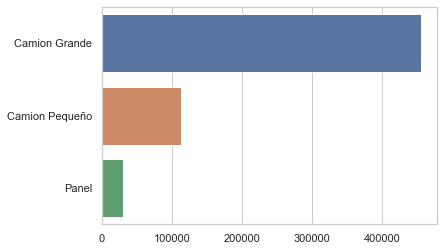

In [84]:
sns.set(style="whitegrid")
x = ['455466.5', '112815.25', '30566.5']
y = ['Camion Grande', 'Camion Pequeño', 'Panel']
ax = sns.barplot(x=x, y=y, data=tips)

### Porcentaje de revenue por tipo de vehiculo

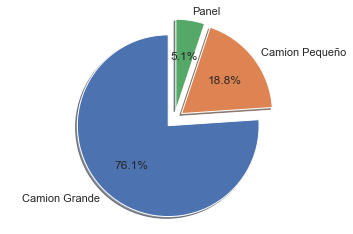

In [124]:
labels = 'Camion Grande', 'Camion Pequeño', 'Panel'
sizes = [455466.5, 112815.25, 30566.5]
explode = (0.1, 0.1, 0.1)  # 0.1 = Separa la pieza

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal asegura que sea un circulo

plt.show()

Podemos ver que los camiones grandes representan mas del 76% de los ingresos. Las paneles solo generan poco más del 5%.
Es un análisis interesante ver cuantos vehiculos hay de cada tipo, veamos:

In [27]:
data.UNIDAD.value_counts()

Camion Grande     1211
Camion Peque�o     605
Panel              364
Name: UNIDAD, dtype: int64

Podemos ver que la mayor cantidad de vehiculos son camiones grandes, con 1211. Le sigue con casi exactamente la mitad, Camiones pequeños con 605. Por ultimo tenemos las paneles con 364. 
Eso nos deja un ingreso promedio por cada vehiculo de:

Grafiquemoslo:

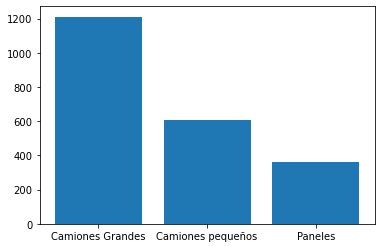

In [75]:
height = [1211, 605, 364]
bars = ('Camiones Grandes', 'Camiones pequeños', 'Paneles')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()


In [35]:
RevCamionGrande = round(455466.5/1211, 2)
RevCamionPeq = round(112815.25/605, 2)
RevPanel = round(30566.5/364, 2)

Rev1 = str(RevCamionGrande)
Rev2 = str(RevCamionPeq)
Rev3 = str(RevPanel)

print("Revenue promedio por Camion Grande: $" + Rev1)
print("Revenue promedio por Camion Pequeño: $" + Rev2)
print("Revenue promedio por Panel: $" + Rev3)

Revenue promedio por Camion Grande: $376.11
Revenue promedio por Camion Pequeño: $186.47
Revenue promedio por Panel: $83.97


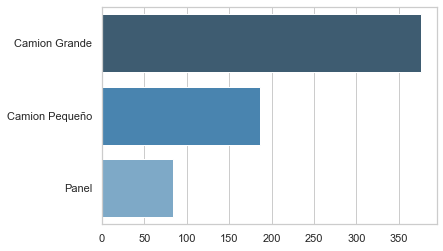

In [85]:
sns.set(style="whitegrid")
x = ['376.11', '186.47', '83.97']
y = ['Camion Grande', 'Camion Pequeño', 'Panel']
ax = sns.barplot(x=x, y=y, data=tips, palette="Blues_d")

Definitivamente el mejor tipo de vehiculo son los Camiones Grandes, pues dejan en promedio 376.11 dolares cada uno. 
Los peores vehiculos son las paneles, pues solo dejan en promedio 83.97 dolares cada una.

Hace falta tomar en cuenta los precios de mantenimiento de cada vehiculo, pero me parece que si se fueran a adquirir nuevos vehiculos, tendrían que ser Camiones Grandes.

### Creditos:

Otro analisis interesante es ver la cantidad de creditos de 30, 60 y 90 días que tomaron los clientes:

In [77]:
data.CREDITO.value_counts()

30    771
60    748
90    661
Name: CREDITO, dtype: int64

El de 30 días es el más usado, pero no por mucho, los de 60 días tienen solo 23 menos. Grafiquemoslo:

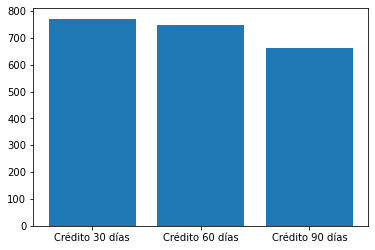

In [79]:
height = [771, 748, 661]
bars = ('Crédito 30 días', 'Crédito 60 días', 'Crédito 90 días')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

### Seleccionar los clientes existentes

In [36]:
data.CLIENTE.value_counts()

TAQUERIA EL CHINITO                                   139
BAR LA OFICINA                                        134
UNIVERSIDAD FRANCISCO MARROQUIN/Despacho a cliente    134
EL PINCHE OBELISCO |||Faltante                        133
ABARROTERIA EBENEZER/Despacho a cliente               131
TIENDA LA BENDICION / Despacho a cliente              129
UBIQUO LABS                                           127
EL GALLO NEGRO / Despacho a cliente                   126
SPORTA, S.A./Despacho a cliente |||Faltante           124
EL PINCHE OBELISCO / Despacho a cliente               123
POLLO PINULITO|||FALTANTE                             119
EL GALLO NEGRO |||DEVOLUCION                          119
UBIQUO LABS |||FALTANTE                               114
CHICHARRONERIA EL RICO COLESTEROL |||Faltante         114
POLLO PINULITO/Despacho a cliente                     109
TAQUERIA EL CHINITO |||Faltante                       108
HOSPITAL ROOSEVELT / Despacho a cliente               105
HOSPITAL LAS A

In [138]:
# Normales
Taqueria_el_chinito = data.loc[data['CLIENTE'] == 'TAQUERIA EL CHINITO']
Bar_la_oficina = data.loc[data['CLIENTE'] == 'BAR LA OFICINA']
Ubiquo = data.loc[data['CLIENTE'] == 'UBIQUO LABS']
Hospital_americas = data.loc[data['CLIENTE'] == 'HOSPITAL LAS AMERICAS']

# Despacho a cliente
El_gallo_negro = data.loc[data['CLIENTE'] == 'EL GALLO NEGRO / Despacho a cliente']
Pinulito = data.loc[data['CLIENTE'] == 'POLLO PINULITO/Despacho a cliente']
Hospital_Roosevelt = data.loc[data['CLIENTE'] == 'HOSPITAL ROOSEVELT / Despacho a cliente']
UFM = data.loc[data['CLIENTE'] == 'UNIVERSIDAD FRANCISCO MARROQUIN/Despacho a cliente']
El_pinche = data.loc[data['CLIENTE'] == 'EL PINCHE OBELISCO / Despacho a cliente']
Ebenezer = data.loc[data['CLIENTE'] == 'ABARROTERIA EBENEZER/Despacho a cliente']
La_bendicion = data.loc[data['CLIENTE'] == 'TIENDA LA BENDICION / Despacho a cliente']

# Faltante
Sporta = data.loc[data['CLIENTE'] == 'SPORTA, S.A./Despacho a cliente |||Faltante']
El_pinche_FALTANTE = data.loc[data['CLIENTE'] == 'EL PINCHE OBELISCO |||Faltante']
Taqueria_chinito = data.loc[data['CLIENTE'] == 'TAQUERIA EL CHINITO |||Faltante']
Uiquo_FALTANTE = data.loc[data['CLIENTE'] == 'UBIQUO LABS |||FALTANTE']
Chicharroneria_colesterol = data.loc[data['CLIENTE'] == 'CHICHARRONERIA EL RICO COLESTEROL |||Faltante']

# Devolucion
Gallo_negro_DEVOLUCION = data.loc[data['CLIENTE'] == 'EL GALLO NEGRO |||DEVOLUCION']

### Clientes sin problemas

In [150]:
Taqueria = Taqueria_el_chinito["INGRESO"].sum()
Bar = Bar_la_oficina["INGRESO"].sum()
Ubiquo = Ubiquo["INGRESO"].sum()
HospitalAmericas = Hospital_americas["INGRESO"].sum()
ElGalloNegro = El_gallo_negro["INGRESO"].sum()
Pinulito = Pinulito["INGRESO"].sum()
Roosevelt = Hospital_Roosevelt["INGRESO"].sum()
UFM = UFM["INGRESO"].sum()
ElPinche = El_pinche["INGRESO"].sum()
Ebenezer = Ebenezer["INGRESO"].sum()
Bendicion = La_bendicion["INGRESO"].sum()

In [151]:
print("Ingresos recaudador por 'Taqueria el Chinito': Q" + str(Taqueria))
print("Ingresos recaudador por 'Bar la oficina': Q" + str(Bar))
print("Ingresos recaudador por 'Ubiquo': Q" + str(Ubiquo))
print("Ingresos recaudador por 'Hospital las americas': Q" + str(HospitalAmericas))
print("Ingresos recaudador por 'El gallo negro': Q" + str(ElGalloNegro))
print("Ingresos recaudador por 'Pinulito': Q" + str(Pinulito))
print("Ingresos recaudador por 'Hospital Roosevelt': Q" + str(Roosevelt))
print("Ingresos recaudador por 'UFM': Q" + str(UFM))
print("Ingresos recaudador por 'El Pinche': Q" + str(ElPinche))
print("Ingresos recaudador por 'Ebenezer': Q" + str(Ebenezer))
print("Ingresos recaudador por 'La Bendicion': Q" + str(Bendicion))

Ingresos recaudador por 'Taqueria el Chinito': Q38274.0
Ingresos recaudador por 'Bar la oficina': Q35163.5
Ingresos recaudador por 'Ubiquo': Q32125.75
Ingresos recaudador por 'Hospital las americas': Q22486.0
Ingresos recaudador por 'El gallo negro': Q34485.0
Ingresos recaudador por 'Pinulito': Q32100.0
Ingresos recaudador por 'Hospital Roosevelt': Q26275.75
Ingresos recaudador por 'UFM': Q37889.25
Ingresos recaudador por 'El Pinche': Q35555.0
Ingresos recaudador por 'Ebenezer': Q37129.0
Ingresos recaudador por 'La Bendicion': Q35338.0


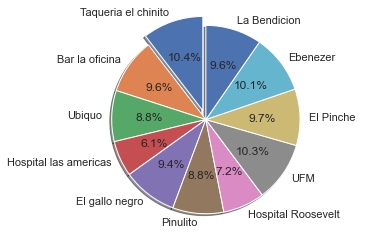

In [127]:
labels = 'Taqueria el chinito', 'Bar la oficina', 'Ubiquo', 'Hospital las americas', 'El gallo negro', 'Pinulito', 'Hospital Roosevelt', 'UFM', 'El Pinche', 'Ebenezer', 'La Bendicion'
sizes = [38274, 35163, 32125, 22486, 34485, 32100, 26275, 37889, 35555, 37129, 35338]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # 0.1 = Separa la pieza

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal asegura que sea un circulo

plt.show()

### Clientes con ordenes pendientes

In [152]:
SportaF = Sporta["INGRESO"].sum()
ElPincheF = El_pinche_FALTANTE["INGRESO"].sum()
TaqueriaChinitoF = Taqueria_chinito["INGRESO"].sum()
UbiquoF = Uiquo_FALTANTE["INGRESO"].sum()
ChicharroneriaF = Chicharroneria_colesterol["INGRESO"].sum()

In [153]:
print("Ingresos recaudador por 'SportaF': Q" + str(SportaF))
print("Ingresos recaudador por 'ElPincheF': Q" + str(ElPincheF))
print("Ingresos recaudador por 'TaqueriaChinitoF': Q" + str(TaqueriaChinitoF))
print("Ingresos recaudador por 'UbiquoF': Q" + str(UbiquoF))
print("Ingresos recaudador por 'ChicharroneriaF': Q" + str(ChicharroneriaF))

Ingresos recaudador por 'SportaF': Q34984.25
Ingresos recaudador por 'ElPincheF': Q35524.0
Ingresos recaudador por 'TaqueriaChinitoF': Q30861.5
Ingresos recaudador por 'UbiquoF': Q32125.0
Ingresos recaudador por 'ChicharroneriaF': Q32456.25


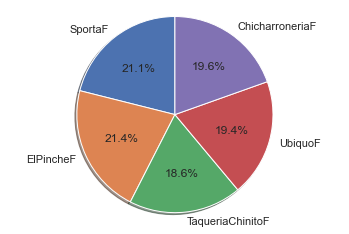

In [142]:
labels = 'SportaF', 'ElPincheF', 'TaqueriaChinitoF', 'UbiquoF', 'ChicharroneriaF'
sizes = [34984, 35524, 30861, 32125, 32456]
explode = (0, 0, 0, 0, 0)  # 0.1 = Separa la pieza

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal asegura que sea un circulo

plt.show()

### Clientes que devolvieron

In [112]:
Gallo_negro_DEVOLUCION.head()

,NUMERO,COD_VIAJE,CLIENTE,UBICACION,CANTIDAD,PILOTO,INGRESO,CREDITO,UNIDAD,MES,AÑO
8,9,10000009,EL GALLO NEGRO |||DEVOLUCION,76002,1601,Ismael Rodero Monteagudo,400.25,30,Camion Grande,1,2019
46,47,10000047,EL GALLO NEGRO |||DEVOLUCION,76002,362,Luis Jaime Urbano,90.50,90,Panel,1,2019
64,65,10000065,EL GALLO NEGRO |||DEVOLUCION,76001,1126,Angel Valdez Alegria,281.50,60,Camion Grande,1,2019
109,110,10000110,EL GALLO NEGRO |||DEVOLUCION,76001,696,Luis Jaime Urbano,174.00,60,Camion Peque�o,1,2019
123,124,10000124,EL GALLO NEGRO |||DEVOLUCION,76002,1618,Felipe Villatoro,404.50,30,Camion Grande,1,2019


El unico cliente que registró una devolución fue el Gallo negro.

In [154]:
GalloDevolucion = Gallo_negro_DEVOLUCION["INGRESO"].sum()
print('El Gallo Negro devolvió un total de : Q' + str(GalloDevolucion))

El Gallo Negro devolvió un total de : Q33070.5


### Comparación de todos los clientes

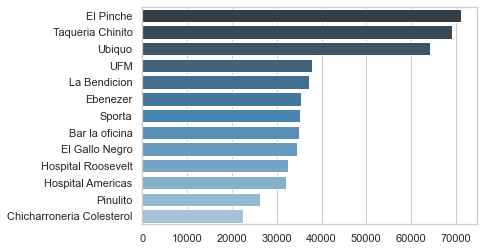

In [167]:
sns.set(style="whitegrid")
x = ['71079', '69135', '64250', '37889','37129', '35338','35163', '34984', '34485', '32456',  '32100',  '26275', '22486']
y = ['El Pinche', 'Taqueria Chinito', 'Ubiquo', 'UFM',  'La Bendicion', 'Ebenezer', 'Sporta',  'Bar la oficina', 'El Gallo Negro', 'Hospital Roosevelt', 'Hospital Americas',  'Pinulito', 'Chicharroneria Colesterol']
ax = sns.barplot(x=x, y=y, data=tips, palette="Blues_d", )

### Cantidad de ingresos y relacion con las empresas mas valiosas

- El Pinche es la empresa que más ingresos representa, con: Q71,079

- Taqueria el Chinito es la segunda empresa que mas ingresos representa, con: Q69,135

- Ubiquo es la tercera empresa más valiosa, representa un total de ganancias de: Q64,250

Si consideramos que el total de revenue de la empresa en el año es de: Q598,848.25, podemos determinar el porcentaje que representa cada una de estas empresas.

In [180]:
pinche = round(7107900/598848, 2)
chinito = round(6913500/598848, 2)
ubiq = round(6425000/598848, 2)

print("El porcentaje de revenue que representa el pinche es de: " + str(pinche) + "%")
print("El porcentaje de revenue que representa el chinito es de: " + str(chinito) + "%")
print("El porcentaje de revenue que representa el ubiquo es de: " + str(ubiq) + "%")

El porcentaje de revenue que representa el pinche es de: 11.87%
El porcentaje de revenue que representa el chinito es de: 11.54%
El porcentaje de revenue que representa el ubiquo es de: 10.73%


### Determinar quienes son los mejores pilotos

In [106]:
data.PILOTO.value_counts()

Fernando Mariano Berrio          267
Pedro Alvarez Parejo             253
Hector Aragones Frutos           248
Felipe Villatoro                 247
Luis Jaime Urbano                246
Ismael Rodero Monteagudo         244
Angel Valdez Alegria             235
Hector Giron                     228
Juan Francisco Portillo Gomez    212
Name: PILOTO, dtype: int64

El piloto con más viajes es Fernando Berrio, con 267 viajes.

### Segmentar por meses

In [107]:
Enero = data.loc[data['MES'] == 1]
Febrero = data.loc[data['MES'] == 2]
Marzo = data.loc[data['MES'] == 3]
Abril = data.loc[data['MES'] == 4]
Mayo = data.loc[data['MES'] == 5]
Junio = data.loc[data['MES'] == 6]
Julio = data.loc[data['MES'] == 7]
Agosto = data.loc[data['MES'] == 8]
Septiembre = data.loc[data['MES'] == 9]
Octubre = data.loc[data['MES'] == 10]
Noviembre = data.loc[data['MES'] == 11]
Diciembre = data.loc[data['MES'] == 12]

In [108]:
print("Viajes en Enero: " + str(len(Enero)))
print("Viajes en Febrero: " + str(len(Febrero)))
print("Viajes en Marzo: "  + str(len(Marzo)))
print("Viajes en Abril: " + str(len(Abril)))
print("Viajes en Mayo: " + str(len(Mayo)))
print("Viajes en Junio: " + str(len(Junio)))
print("Viajes en Julio: " + str(len(Julio)))
print("Viajes en Agosto: " + str(len(Agosto)))
print("Viajes en Septiembre: " + str(len(Septiembre)))
print("Viajes en Octubre: " + str(len(Octubre)))
print("Viajes en Noviembre: " + str(len(Noviembre)))
print("Viajes en Diciembre: " + str(len(Diciembre)))

Viajes en Enero: 192
Viajes en Febrero: 203
Viajes en Marzo: 182
Viajes en Abril: 196
Viajes en Mayo: 215
Viajes en Junio: 197
Viajes en Julio: 211
Viajes en Agosto: 199
Viajes en Septiembre: 188
Viajes en Octubre: 200
Viajes en Noviembre: 197
Viajes en Diciembre: 0


### Determinar si los pilotos nos están robando

In [185]:
TotalRevenue = data["INGRESO"].sum()
TotalPaquetes = data["CANTIDAD"].sum()

print("Total de Revenue: Q" + str(TotalRevenue))
print("Total de Paquetes: " + str(TotalPaquetes))

PrecioIndividual = TotalRevenue/TotalPaquetes

print("Precio individual: Q" + str(PrecioIndividual))

Total de Revenue: Q598848.25
Total de Paquetes: 2395393
Precio individual: Q0.25


Sabemos que el precio de cada paquete es de 25 centavos, por lo que podemos determinar que, dado que la cantidad de paquetes multiplicado por 0.25, da exactamente nuestro revenue total, no nos han robado.